In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/body-fat-prediction-dataset")

print("Path to dataset files:", path)

/mnt/d/Forschung/Body-Fat-Prediction/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/kesslermatics/.cache/kagglehub/datasets/fedesoriano/body-fat-prediction-dataset/versions/1


In [3]:
import pandas as pd
import os

# Load the dataset CSV file from the downloaded path
csv_file = os.path.join(path, "bodyfat.csv")
df = pd.read_csv(csv_file)

# Display the first few rows of the dataset
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


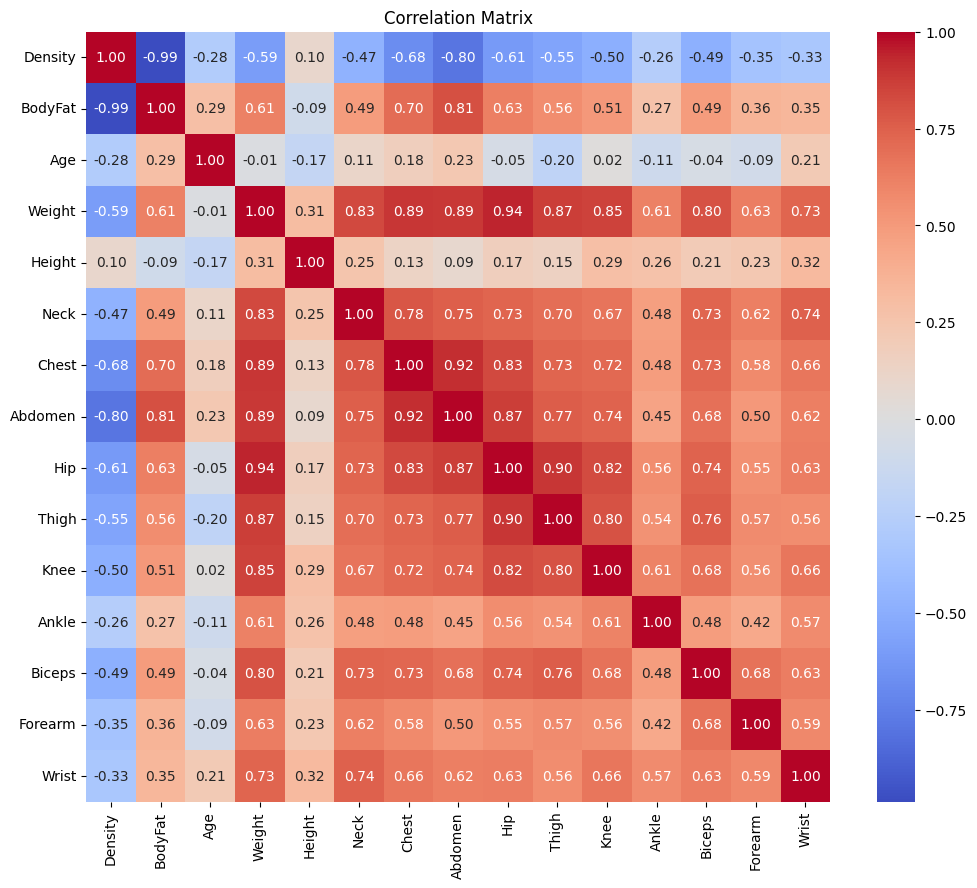

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop 'BodyFat' (target variable) and 'Density' (used to derive BodyFat via Siri's equation)
# Including 'Density' would cause data leakage, as BodyFat is calculated directly from it:
# BodyFat = (495 / Density) - 450
X = df.drop(columns=["BodyFat", "Density"])
y = df["BodyFat"]

# Split data into training and testing sets
# test_size=0.2 means 20% of the data is used for testing, which is a common default that balances
# training performance with generalization ability
# random_state=42 is set for reproducibility – it ensures the same data split every time the code runs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))



R² Score: 0.6134842007585334
MSE: 17.979968994818297


In [7]:
# First iteration:
# R² Score: 0.6134842007585334
# MSE: 17.979968994818297

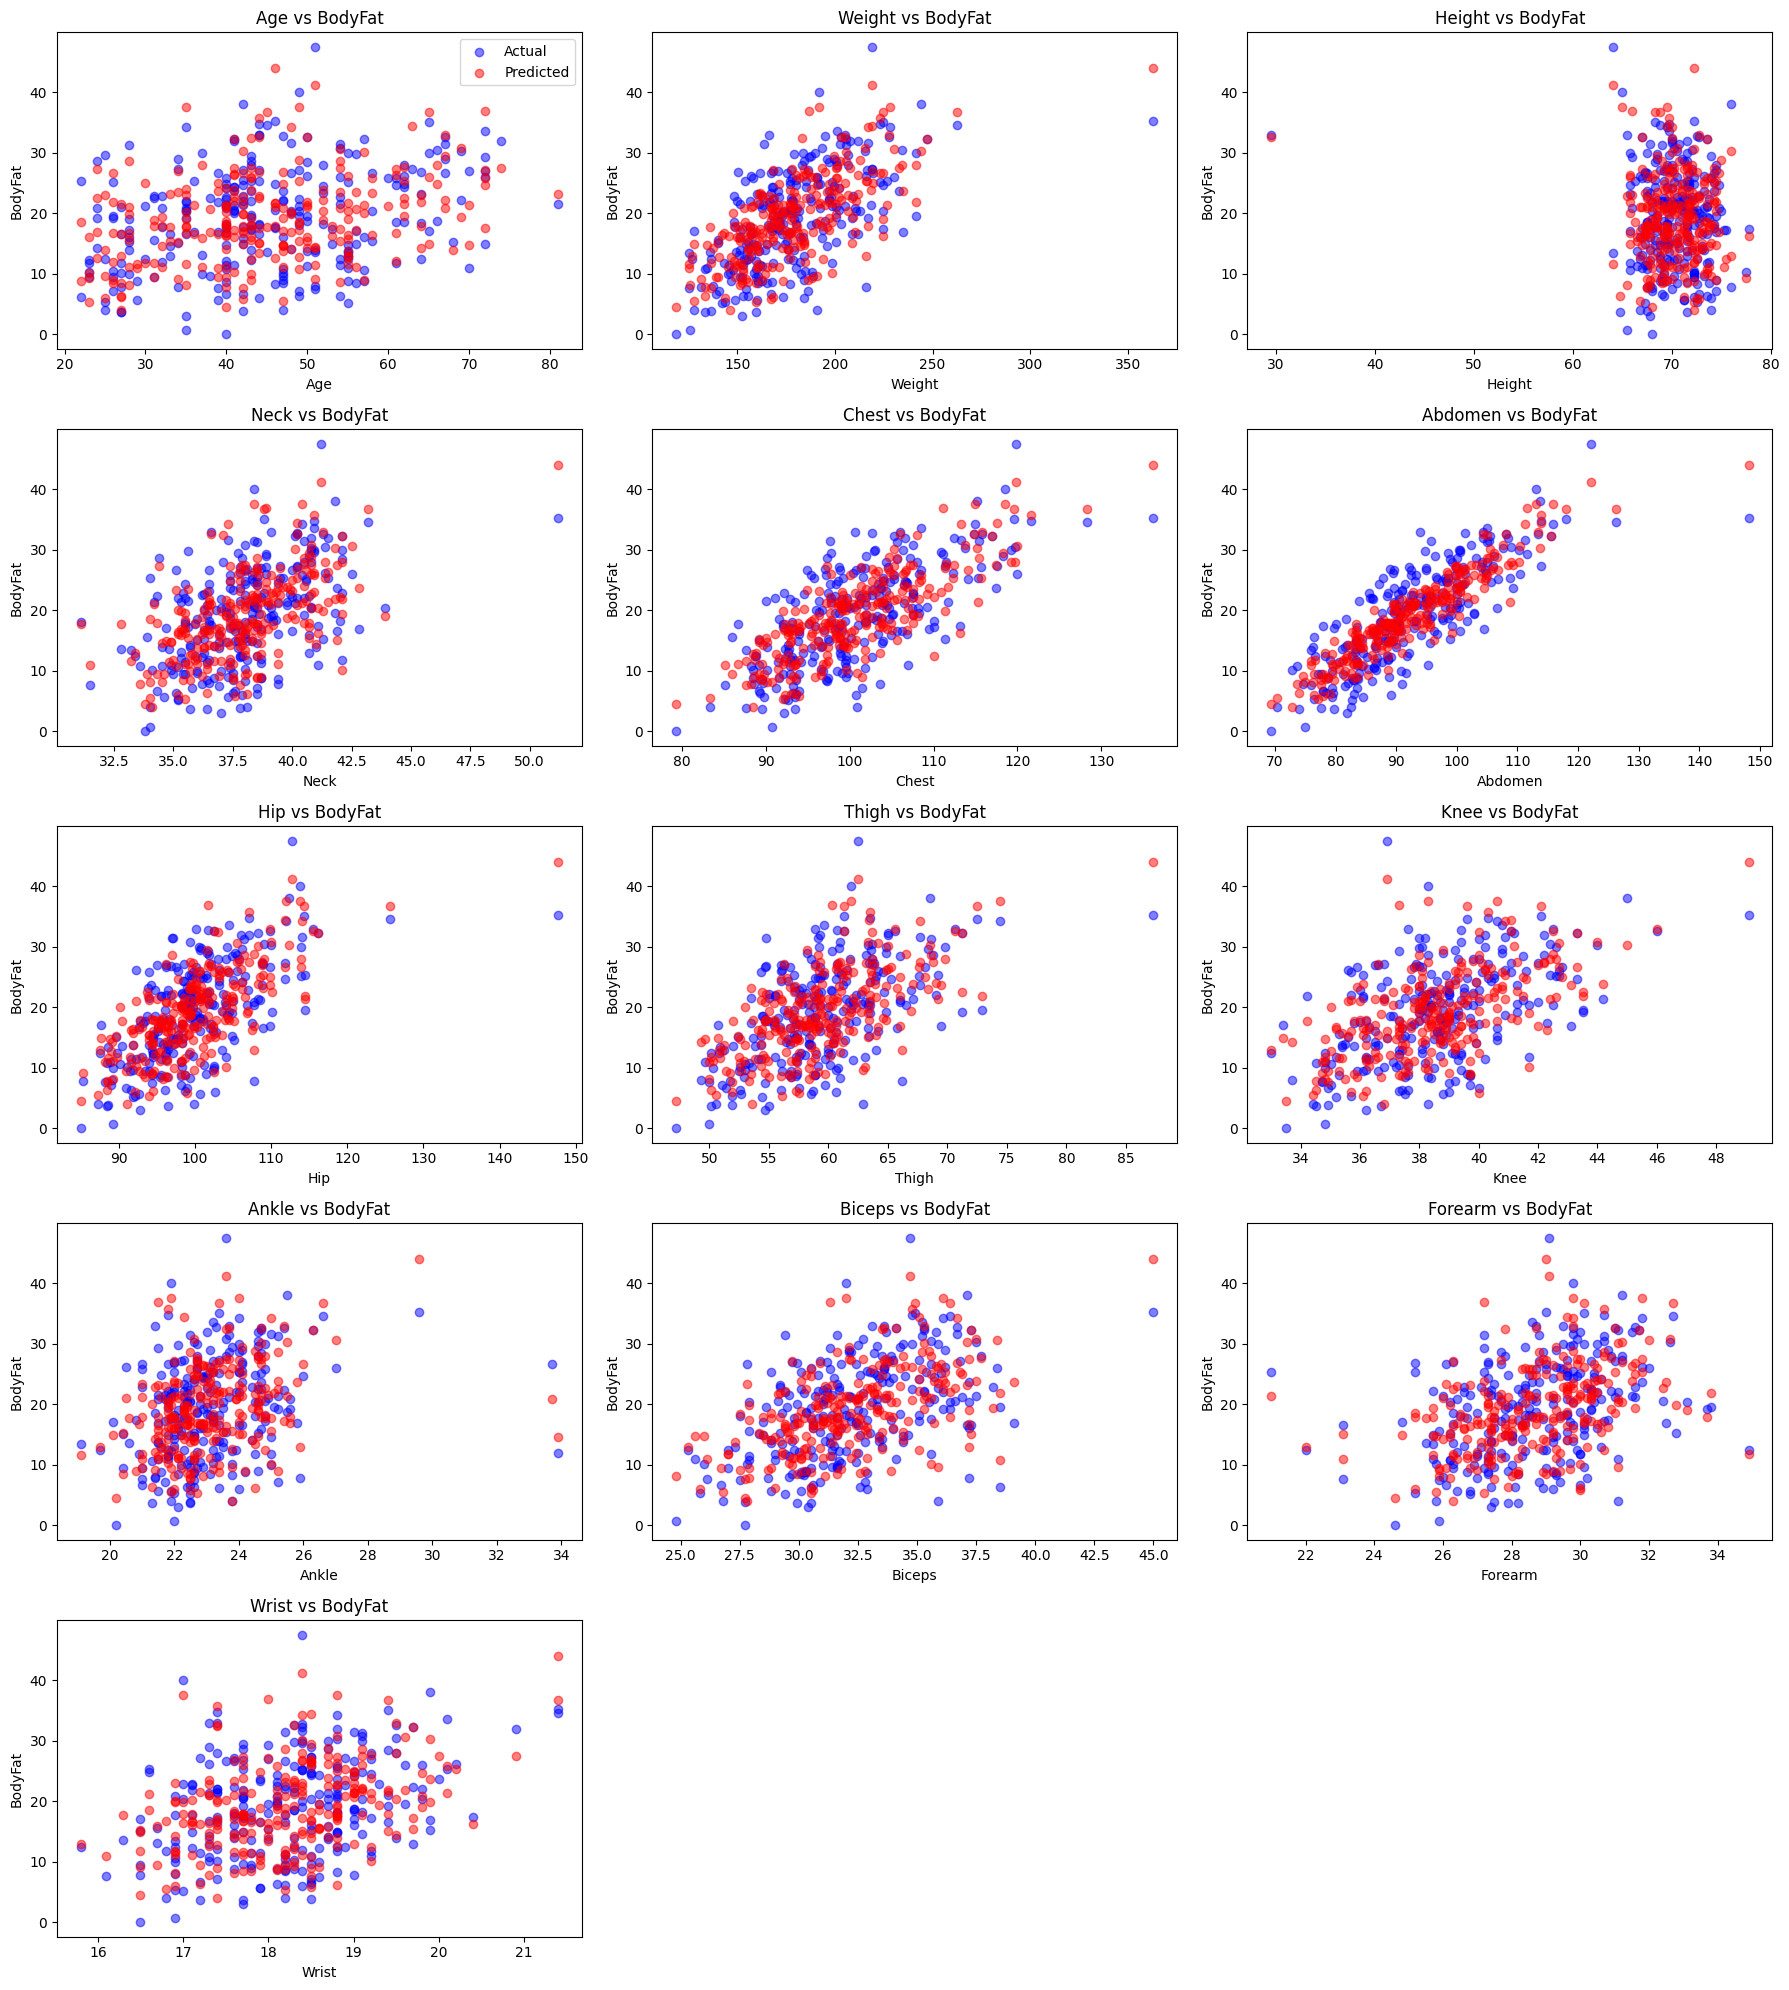

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Re-train model on full data
X = df.drop(columns=["BodyFat", "Density"])
y = df["BodyFat"]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot actual vs. predicted values per feature
features = X.columns
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))
plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    x_vals = X[feature].values  # ensure numpy array

    plt.scatter(x_vals, y.values, color='blue', label='Actual', alpha=0.5)
    plt.scatter(x_vals, y_pred, color='red', label='Predicted', alpha=0.5)

    plt.xlabel(feature)
    plt.ylabel("BodyFat")
    plt.title(f"{feature} vs BodyFat")
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.show()

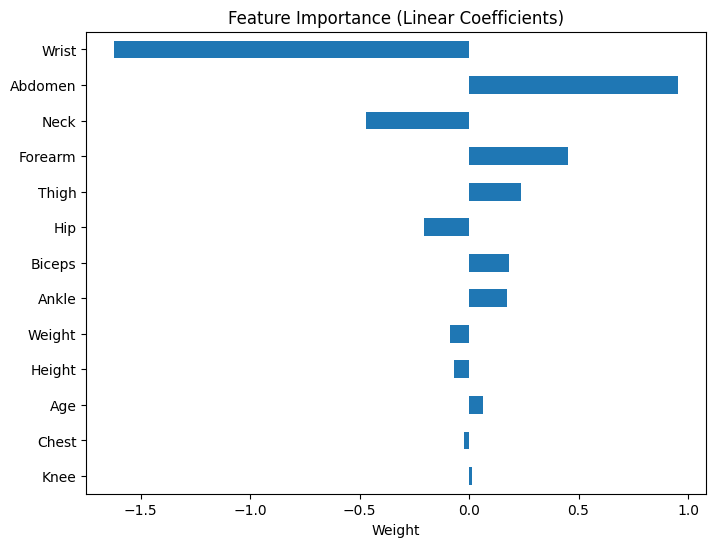

In [10]:
import pandas as pd

# Get feature importances (coefficients) from linear model
importance = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)

# Plot
importance.plot(kind="barh", figsize=(8,6), title="Feature Importance (Linear Coefficients)")
plt.xlabel("Weight")
plt.gca().invert_yaxis()
plt.show()

In [11]:
# Create engineered features
df["BMI"] = df["Weight"] / (df["Height"] ** 2) * 703  # standard BMI in lbs/inches
df["WaistHipRatio"] = df["Abdomen"] / df["Hip"]

# Define selected features
selected_features = ["Wrist", "BMI", "WaistHipRatio", "Neck", "Forearm", "Thigh", "Hip", "Biceps", "Ankle"]

# Prepare data
X_sel = df[selected_features]
y = df["BodyFat"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=42)

# Fit linear model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model_sel = LinearRegression()
model_sel.fit(X_train, y_train)

# Predict and evaluate
y_pred_sel = model_sel.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred_sel))
print("MSE:", mean_squared_error(y_test, y_pred_sel))


R² Score: 0.6545534484315224
MSE: 16.069506857824145
